In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [6]:
root_path = '../'
datasets = ['mnli','agnews', 'yahoo','yelp-full'] # , 
methods = ['fedclassifier', 'fedpet']

sampled_data = 100
clients_in_total = 10
clients = 5
iter = 100
beta=1

log_paths_all = {}
csv_paths_all = {}
csv_niid_paths_all = {}
for dataset in datasets:
    log_paths_all[dataset] = []
    csv_paths_all[dataset] = []
    csv_niid_paths_all[dataset] = []
    for method in methods:
        log_paths_all[dataset].append(os.path.join(root_path, 'log', dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".log"))
        csv_paths_all[dataset].append(os.path.join(root_path, "data", dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".csv"))
        csv_niid_paths_all[dataset].append(os.path.join(root_path, "data", dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + "_" + str(beta) + ".csv"))


In [7]:
colors = ['g', 'r', 'b', 'y', 'purple','k', 'olive','cyan']

fedclassifier 0.4487356321839081
fedclassifier 0.4462068965517241
fedpet 0.47977011494252875
fedpet 0.4777777777777778
../fig/eval-performance-hybrid-mnli_100.pdf
fedclassifier nan
fedclassifier 0.851842105263158
fedpet 0.8713157894736842
fedpet 0.8718421052631579
../fig/eval-performance-hybrid-agnews_100.pdf
fedclassifier 0.49923333333333336
fedclassifier 0.17926666666666663
fedpet 0.6376666666666667
fedpet 0.5464
../fig/eval-performance-hybrid-yahoo_100.pdf
fedclassifier 0.4112
fedclassifier 0.32488
fedpet 0.42716000000000004
fedpet 0.40628000000000003
../fig/eval-performance-hybrid-yelp-full_100.pdf


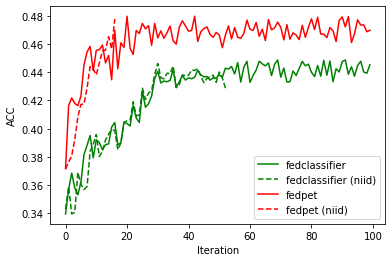

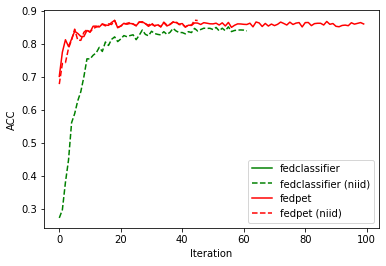

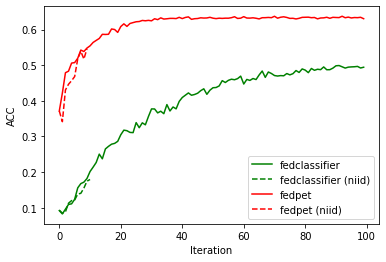

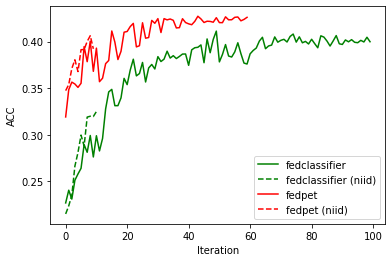

In [11]:
for dataset in datasets:
    fig = plt.figure()
    # plt.title(dataset)
    plt.xlabel('Iteration')
    plt.ylabel('ACC')
    csv_paths = csv_paths_all[dataset]
    csv_niid_paths = csv_niid_paths_all[dataset]

    for i in range(len(methods)):
        csv_path = csv_paths[i]
        csv_niid_path = csv_niid_paths[i]

        df = pd.read_csv(csv_path,index_col=0)
        y_mean = []
        for j in range(iter):
            x = np.array([j]*5)
            y = np.array(df.iloc[j])
            # print(x,y)
            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(x, y,color=colors[i])
        print(methods[i], float(np.max(pd.DataFrame(y_mean).dropna())))
        plt.plot(range(iter),y_mean,color=colors[i],label=methods[i])

        df = pd.read_csv(csv_niid_path,index_col=0)
        y_mean = []
        for j in range(iter):
            x = np.array([j]*5)
            y = np.array(df.iloc[j])
            # print(x,y)
            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(x, y,color=colors[i])
        print(methods[i], float(np.max(pd.DataFrame(y_mean).dropna())))
        plt.plot(range(iter),y_mean,color=colors[i],label=methods[i]+" (niid)",ls = "--")

    plt.legend()
    print("../fig/eval-performance-hybrid-" + dataset + "_" + str(sampled_data) + '.pdf')
    plt.savefig("../fig/eval-performance-hybrid-" + dataset + "_" + str(sampled_data) + '.pdf')


    
    
    # plt.show()